In [2]:
import pandas as pd
import holidays
import seaborn as sns
import requests
import numpy as np
from time import sleep
from shutil import copyfile
import random
from scipy import stats

In [3]:
%matplotlib inline
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [3]:
# # # To find out where the pyspark
# # import findspark
# # findspark.init()

# # # Creating Spark Context
# # from pyspark import SparkContext, SQLContext
# from pyspark.sql import SparkSession
# from pyspark.sql import functions as F
# from pyspark.sql.functions import UserDefinedFunction as udf
# from pyspark.sql.types import StringType, IntegerType, DecimalType, DoubleType

In [6]:
# """SimpleApp.py"""
# spark = SparkSession.builder.appName("FirstSparkApp").getOrCreate()

In [5]:
# spark.stop()

In [8]:
# df_orig = spark.read\
#     .format("com.databricks.spark.csv")\
#     .option("header", "true") \
#     .option("mode", "DROPMALFORMED")\
#     .option("inferSchema", "true")\
#     .load("/home/arditto_trianggada3/Workspace/ds-ovo-test/dataset/trip_merge_4_fe_all.csv")\
# #     .limit(100000)

In [9]:
# df = df_orig.limit(1000000)

In [ ]:
# df = df.toPandas()

# Read Dataset

In [4]:
df_orig = pd.read_csv("./dataset/trip_merge_4_fe_all.csv",nrows=1000000)
# df_orig = pd.read_csv("/Users/arditto/Downloads/trip_merge_4_fe_sample2000000.csv")

In [5]:
Nall = df_orig.shape[0]
Nsample = 100000

In [6]:
isample = random.sample(range(Nall),Nsample)

In [7]:
df = df_orig.loc[isample,:].reset_index(drop=True)

# Do some feature engineering if needed

In [8]:
def bin_hour(x):
    if x<6:
        res = "00_05"
    elif x==6:
        res = "06"
    elif x==7:
        res = "07"
    elif x<10:
        res = "08_09"
    elif x<15:
        res = "10_15"
    elif x==16:
        res = "16"
    elif x<17:
        res = "17"
    elif x<21:
        res = "18_20"
    else:
        res = "21_23"
    return res

df['pickup_hour_bin'] = df['pickup_hour'].map(lambda x: bin_hour(x))
df['dropoff_hour_bin'] = df['dropoff_hour'].map(lambda x: bin_hour(x))

In [9]:
df.tail(5)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_longitude_bin,pickup_latitude_bin,dropoff_longitude_bin,dropoff_latitude_bin,pickup_addr_zipcode,pickup_addr_place,pickup_addr_neighborhood,pickup_addr_sublocal,pickup_addr_local,pickup_addr_administrative_area_level_2,dropoff_addr_zipcode,dropoff_addr_place,dropoff_addr_neighborhood,dropoff_addr_sublocal,dropoff_addr_local,dropoff_addr_administrative_area_level_2,pickup_to_dropoff_zipcode,pickup_to_dropoff_place,pickup_to_dropoff_neighborhood,pickup_to_dropoff_sublocal,pickup_to_dropoff_local,pickup_to_dropoff_administrative_area_level_2,pickup_month,pickup_dayofweek,pickup_hour,dropoff_month,dropoff_dayofweek,dropoff_hour,is_public_holiday,is_weekend,is_holiday,trip_night,trip_late_night,trip_dist_euclidean,trip_dist_manhattan,pickup_hour_bin,dropoff_hour_bin
99995,D26494D0B7D45CFBF4FA2712ACFE6571,3CD7BABEB07E9522DB65D364503A0EA1,CMT,1,N,2013-04-23 13:44:39,2013-04-23 13:48:24,1,224,0.60,-73.967430,40.769047,-73.961830,40.776657,CSH,4.5,0.0,0.5,0.0,0.0,5.0,-73.965,40.770,-73.960,40.780,10021.0,Park Ave,NaN,Manhattan,New York,New York County,10075.0,E 79th St,NaN,Manhattan,New York,New York County,10021.0_10075.0,Park Ave_E 79th St,nan_nan,Manhattan_Manhattan,New York_New York,New York County_New York County,4,Tuesday,13,4,Tuesday,13,0,0,0,0,0,0.009448,0.013210,10_15,10_15
99996,23D9EAD1DC9D4D3FA45B5D77B0315BC7,06FFE45DC40892EA25BF42863469AE8D,CMT,1,N,2013-04-06 12:47:58,2013-04-06 12:57:13,1,555,1.90,-73.953911,40.784828,-73.971931,40.759251,CSH,9.5,0.0,0.5,0.0,0.0,10.0,-73.950,40.785,-73.970,40.760,10128.0,E 93rd St,NaN,Manhattan,New York,New York County,10022.0,Lexington Ave,NaN,Manhattan,New York,New York County,10128.0_10022.0,E 93rd St_Lexington Ave,nan_nan,Manhattan_Manhattan,New York_New York,New York County_New York County,4,Saturday,12,4,Saturday,12,0,1,1,0,0,0.031287,0.043597,10_15,10_15
99997,8DEB70907D00AA1D7FF5E2683240549B,0F33B5F4A06061F0DF81FE481774CF55,VTS,1,NaN,2013-04-16 17:59:00,2013-04-16 18:21:00,1,1320,1.47,-73.977638,40.753372,-74.000053,40.762749,CSH,14.0,1.0,0.5,0.0,0.0,15.5,-73.975,40.755,-74.000,40.765,10036.0,5th Ave,NaN,Manhattan,New York,New York County,10036.0,12th Ave,NaN,NaN,New York,NaN,10036.0_10036.0,5th Ave_12th Ave,nan_nan,Manhattan_nan,New York_New York,New York County_nan,4,Tuesday,17,4,Tuesday,18,0,0,0,1,0,0.024297,0.031792,18_20,18_20
99998,C3DC42D3BD4AA46215F27DC2CFCA8BC6,755DA8141E6B446C48BFB5E06121BD6A,VTS,1,NaN,2013-04-25 12:52:00,2013-04-25 13:05:00,5,780,1.13,-73.982201,40.746094,-73.977852,40.757690,CSH,9.5,0.0,0.5,0.0,0.0,10.0,-73.980,40.750,-73.975,40.760,10016.0,E 32nd St,NaN,Manhattan,New York,New York County,10020.0,Rockefeller Plaza,NaN,Manhattan,New York,New York County,10016.0_10020.0,E 32nd St_Rockefeller Plaza,nan_nan,Manhattan_Manhattan,New York_New York,New York County_New York County,4,Thursday,12,4,Thursday,13,0,0,0,0,0,0.012385,0.015945,10_15,10_15
99999,F35792DCBBF75BACC550051F35D9514A,56771C4D3B7852329AAE8C6134EBCBE6,CMT,1,N,2013-04-18 09:54:06,2013-04-18 10:17:20,1,1393,9.10,-73.972328,40.756805,-73.872589,40.774418,CRD,28.0,0.0,0.5,6.0,0.0,34.5,-73.970,40.760,-73.870,40.775,10017.0,E 49th St,NaN,Manhattan,New York,New York County,11371.0,LGA AA Hanger 1,East Elmhurst,Queens,NaN,Queens County,10017.0_11371.0,E 49th St_LGA AA Hanger 1,nan_nan,Manhattan_Queens,New York_nan,New York County_Queens County,4,Thursday,9,4,Thursday,10,0,0,0,0,0,0.101282,0.117352,08_09,10_15


# Profiling the Data

In [10]:
df.is_holiday.value_counts(normalize=True,dropna=True)

0    0.72765
1    0.27235
Name: is_holiday, dtype: float64

In [11]:
df.trip_night.value_counts(normalize=True,dropna=True)

0    0.79233
1    0.20767
Name: trip_night, dtype: float64

In [12]:
df.dropoff_dayofweek.value_counts(normalize=True,dropna=True)

Tuesday      0.16226
Monday       0.14831
Friday       0.14649
Saturday     0.14594
Thursday     0.13760
Wednesday    0.13172
Sunday       0.12768
Name: dropoff_dayofweek, dtype: float64

In [13]:
df.pickup_to_dropoff_administrative_area_level_2.value_counts(normalize=True,dropna=True)

New York County_New York County          0.84755
New York County_Queens County            0.03379
New York County_Kings County             0.02998
Queens County_New York County            0.02938
Kings County_Kings County                0.01331
Queens County_Queens County              0.01268
Kings County_New York County             0.00862
Queens County_Kings County               0.00539
New York County_nan                      0.00462
New York County_Bronx County             0.00359
nan_New York County                      0.00282
New York County_Essex County             0.00130
Kings County_Queens County               0.00127
Queens County_Bronx County               0.00081
New York County_Hudson County            0.00074
Hudson County_Hudson County              0.00069
nan_Kings County                         0.00063
Kings County_nan                         0.00051
Bronx County_Bronx County                0.00035
Queens County_nan                        0.00033
Bronx County_New Yor

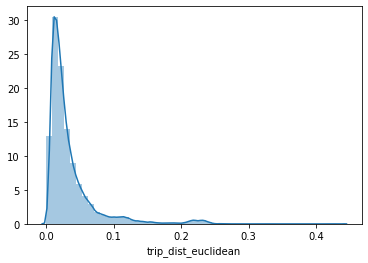

In [14]:
sns.distplot(df.trip_dist_euclidean)

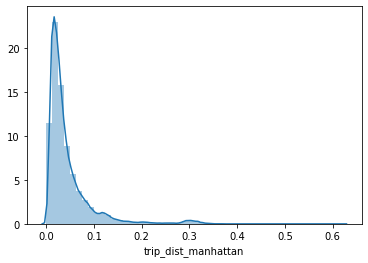

In [15]:
sns.distplot(df.trip_dist_manhattan)

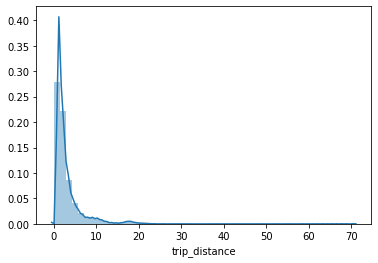

In [16]:
sns.distplot(df.trip_distance)

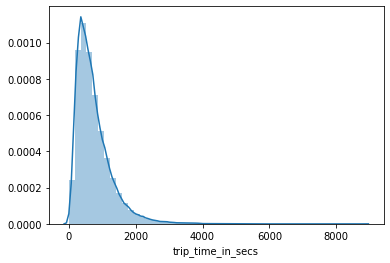

In [17]:
sns.distplot(df.trip_time_in_secs)

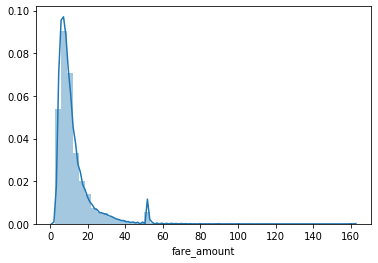

In [18]:
sns.distplot(df['fare_amount'],hist=True)

# Treat Outliers (Removal or Imputation)

In [19]:
df.fare_amount.quantile(0.999)

70.33017000000065

In [20]:
outlier_fare_amount = df.fare_amount.quantile(0.999)
df_excl_outlier_fare = df.loc[(df.fare_amount<=outlier_fare_amount),:]

In [21]:
tmp = df_excl_outlier_fare

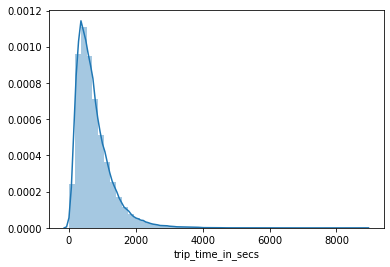

In [22]:
sns.distplot(tmp['trip_time_in_secs'],hist=True)

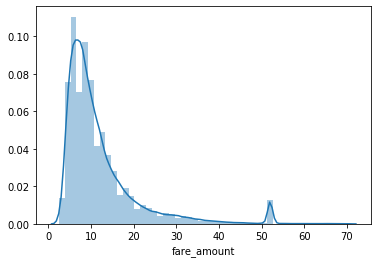

In [23]:
sns.distplot(tmp['fare_amount'],hist=True)

# Exploratory Data Analysis

## (Fare Amount / Trip Time) vs Feature

### trip_time_in_secs vs pickup_dayofweek

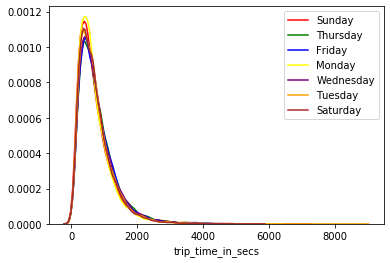

In [71]:
feat = 'pickup_dayofweek'
label = 'trip_time_in_secs'
lval = tmp[feat].unique()
lcol = ['red','green','blue','yellow','purple','orange','brown','grey','aqua']

i = 0
for v in lval:
    ax = sns.distplot(tmp.loc[tmp[feat]==v,label],hist=False,color=lcol[i],kde=True,label=v)
    i+=1
    
ax.legend()

### fare_amount vs pickup_dayofweek

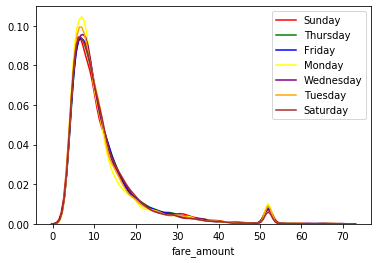

In [72]:
feat = 'pickup_dayofweek'
label = 'fare_amount'
lval = tmp[feat].unique()
lcol = ['red','green','blue','yellow','purple','orange','brown','grey','aqua']

i = 0
for v in lval:
    ax = sns.distplot(tmp.loc[tmp[feat]==v,label],hist=False,color=lcol[i],kde=True,label=v)
    i+=1
    
ax.legend()

### trip_time_in_secs vs pickup_hour_bin

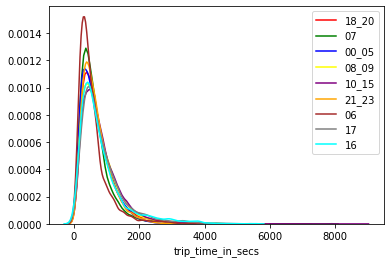

In [73]:
feat = 'pickup_hour_bin'
label = 'trip_time_in_secs'
lval = tmp[feat].unique()
lcol = ['red','green','blue','yellow','purple','orange','brown','grey','aqua']

i = 0
for v in lval:
    ax = sns.distplot(tmp.loc[tmp[feat]==v,label],hist=False,color=lcol[i],kde=True,label=v)
    i+=1
    
ax.legend()

### fare_amount vs pickup_hour_bin

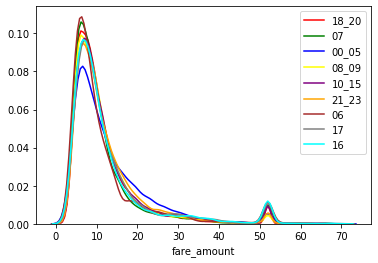

In [74]:
feat = 'pickup_hour_bin'
label = 'fare_amount'
lval = tmp[feat].unique()
lcol = ['red','green','blue','yellow','purple','orange','brown','grey','aqua']

i = 0
for v in lval:
    ax = sns.distplot(tmp.loc[tmp[feat]==v,label],hist=False,color=lcol[i],kde=True,label=v)
    i+=1
    
ax.legend()

### trip_time_in_secs vs pickup_addr_administrative_area_level_2

In [121]:
feat = 'pickup_addr_administrative_area_level_2'
lval = tmp[feat].value_counts(normalize=True,dropna=True)[(tmp[feat].value_counts(normalize=True,dropna=True)>0.01)].index.values
lcol = ['red','green','blue','yellow','purple','orange','brown','grey','aqua']

lval

array(['New York County', 'Queens County', 'Kings County'], dtype=object)

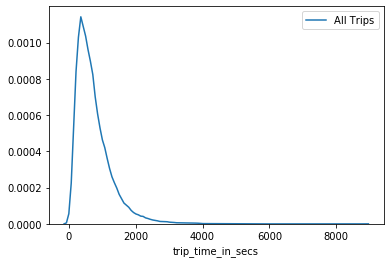

In [122]:
sns.distplot(df['trip_time_in_secs'],hist=False,label='All Trips')

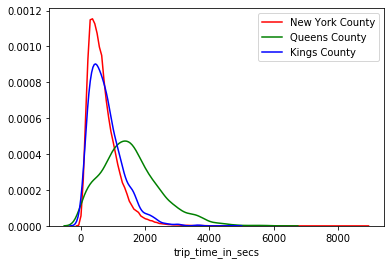

In [123]:
label = 'trip_time_in_secs'

i = 0
for v in lval:
    ax = sns.distplot(tmp.loc[tmp[feat]==v,label],hist=False,color=lcol[i],kde=True,label=v)
    i+=1
    
ax.legend()

In [124]:
v = 'New York County'

stats.ks_2samp(
    df_excl_outlier_fare['trip_time_in_secs'], 
    df_excl_outlier_fare.loc[df_excl_outlier_fare[feat]==v,'trip_time_in_secs']
)

Ks_2sampResult(statistic=0.02698599253742362, pvalue=8.911856030882008e-31)

In [125]:
v = 'Kings County'

stats.ks_2samp(
    df_excl_outlier_fare['trip_time_in_secs'], 
    df_excl_outlier_fare.loc[df_excl_outlier_fare[feat]==v,'trip_time_in_secs']
)

Ks_2sampResult(statistic=0.07643268426188077, pvalue=2.8838049543007082e-12)

In [126]:
v = 'Queens County'

stats.ks_2samp(
    df_excl_outlier_fare['trip_time_in_secs'], 
    df_excl_outlier_fare.loc[df_excl_outlier_fare[feat]==v,'trip_time_in_secs']
)

Ks_2sampResult(statistic=0.4847701386029916, pvalue=0.0)

In [127]:
v = 'New York County'

stats.ttest_ind(
    df_excl_outlier_fare['trip_time_in_secs'],
    df_excl_outlier_fare.loc[df_excl_outlier_fare[feat]==v,'trip_time_in_secs'], 
equal_var = False)

Ttest_indResult(statistic=19.29393502020747, pvalue=7.242115516877997e-83)

In [128]:
v = 'Kings County'

stats.ttest_ind(
    df_excl_outlier_fare['trip_time_in_secs'],
    df_excl_outlier_fare.loc[df_excl_outlier_fare[feat]==v,'trip_time_in_secs'], 
equal_var = False)

Ttest_indResult(statistic=-5.338386571755953, pvalue=1.0223260762982109e-07)

In [129]:
v = 'Queens County'

stats.ttest_ind(
    df_excl_outlier_fare['trip_time_in_secs'],
    df_excl_outlier_fare.loc[df_excl_outlier_fare[feat]==v,'trip_time_in_secs'], 
equal_var = False)

Ttest_indResult(statistic=-61.16753541925203, pvalue=0.0)

### fare_amount vs pickup_addr_administrative_area_level_2

In [143]:
feat = 'pickup_addr_administrative_area_level_2'
lval = tmp[feat].value_counts(normalize=True,dropna=True)[(tmp[feat].value_counts(normalize=True,dropna=True)>0.01)].index.values
lcol = ['red','green','blue','yellow','purple','orange','brown','grey','aqua']

lval

array(['New York County', 'Queens County', 'Kings County'], dtype=object)

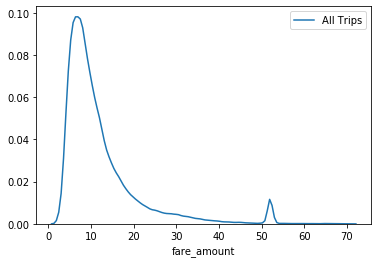

In [144]:
sns.distplot(tmp['fare_amount'],hist=False,label='All Trips')

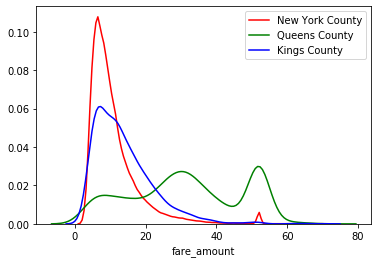

In [145]:
label = 'fare_amount'

i = 0
for v in lval:
    ax = sns.distplot(tmp.loc[tmp[feat]==v,label],hist=False,color=lcol[i],kde=True,label=v)
    i+=1
    
ax.legend()

In [146]:
v = 'New York County'

stats.ks_2samp(
    df_excl_outlier_fare['fare_amount'], 
    df_excl_outlier_fare.loc[df_excl_outlier_fare[feat]==v,'fare_amount']
)

Ks_2sampResult(statistic=0.035462103697915026, pvalue=7.755154003811822e-53)

In [147]:
v = 'Kings County'

stats.ks_2samp(
    df_excl_outlier_fare['fare_amount'], 
    df_excl_outlier_fare.loc[df_excl_outlier_fare[feat]==v,'fare_amount']
)

Ks_2sampResult(statistic=0.16965421879599413, pvalue=9.154748260255415e-59)

In [148]:
v = 'Queens County'

stats.ks_2samp(
    df_excl_outlier_fare['fare_amount'], 
    df_excl_outlier_fare.loc[df_excl_outlier_fare[feat]==v,'fare_amount']
)

Ks_2sampResult(statistic=0.6227325060754455, pvalue=0.0)

In [149]:
v = 'New York County'

stats.ttest_ind(
    df_excl_outlier_fare['fare_amount'],
    df_excl_outlier_fare.loc[df_excl_outlier_fare[feat]==v,'fare_amount'], 
equal_var = False)

Ttest_indResult(statistic=28.139509929530767, pvalue=7.381767786270431e-174)

In [150]:
v = 'Kings County'

stats.ttest_ind(
    df_excl_outlier_fare['fare_amount'],
    df_excl_outlier_fare.loc[df_excl_outlier_fare[feat]==v,'fare_amount'], 
equal_var = False)

Ttest_indResult(statistic=-9.278420772627442, pvalue=3.593437156272732e-20)

In [151]:
v = 'Queens County'

stats.ttest_ind(
    df_excl_outlier_fare['fare_amount'],
    df_excl_outlier_fare.loc[df_excl_outlier_fare[feat]==v,'fare_amount'], 
equal_var = False)

Ttest_indResult(statistic=-85.41893510942727, pvalue=0.0)

### trip_time_in_secs vs pickup_to_dropoff_administrative_area_level_2

In [110]:
feat = 'pickup_to_dropoff_administrative_area_level_2'
lval = tmp[feat].value_counts(normalize=True,dropna=True)[(tmp[feat].value_counts(normalize=True,dropna=True)>0.005)].index.values
lcol = ['red','green','blue','yellow','purple','orange','brown','grey','aqua']

lval


array(['New York County_New York County', 'New York County_Queens County',
       'New York County_Kings County', 'Queens County_New York County',
       'Kings County_Kings County', 'Queens County_Queens County',
       'Kings County_New York County', 'Queens County_Kings County'],
      dtype=object)

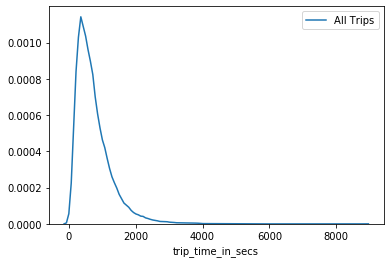

In [111]:
sns.distplot(df['trip_time_in_secs'],hist=False,label='All Trips')

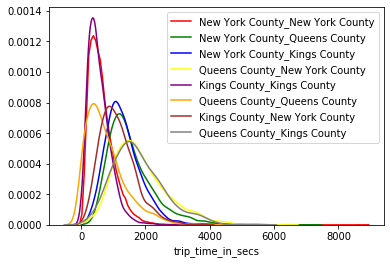

In [112]:
label = 'trip_time_in_secs'

i = 0
for v in lval:
    ax = sns.distplot(tmp.loc[tmp[feat]==v,label],hist=False,color=lcol[i],kde=True,label=v)
    i+=1
    
ax.legend()

### fare_amount vs pickup_to_dropoff_administrative_area_level_2

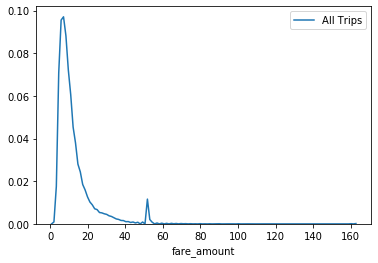

In [116]:
sns.distplot(df['fare_amount'],hist=False,label='All Trips')

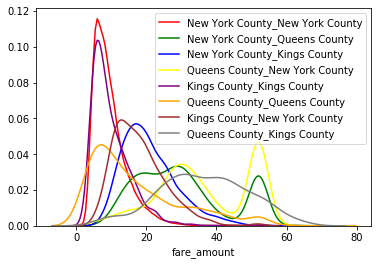

In [117]:
label = 'fare_amount'

i = 0
for v in lval:
    ax = sns.distplot(tmp.loc[tmp[feat]==v,label],hist=False,color=lcol[i],kde=True,label=v)
    i+=1
    
ax.legend()

In [113]:
v = 'New York County_New York County'

stats.ks_2samp(
    df_excl_outlier_fare['fare_amount'], 
    df_excl_outlier_fare.loc[df_excl_outlier_fare[feat]==v,'fare_amount']
)

Ks_2sampResult(statistic=0.09031071613429542, pvalue=0.0)

In [114]:
v = 'Queens County_Queens County'

stats.ks_2samp(
    df_excl_outlier_fare['fare_amount'], 
    df_excl_outlier_fare.loc[df_excl_outlier_fare[feat]==v,'fare_amount']
)

Ks_2sampResult(statistic=0.21547575199508906, pvalue=3.111829822753986e-51)

In [115]:
v = 'Queens County_Kings County'

stats.ks_2samp(
    df_excl_outlier_fare['fare_amount'], 
    df_excl_outlier_fare.loc[df_excl_outlier_fare[feat]==v,'fare_amount']
)

Ks_2sampResult(statistic=0.7999655521443231, pvalue=1.5557546006598727e-300)

In [117]:
feat = 'is_holiday'
lval = tmp[feat].value_counts(normalize=True,dropna=True)[(tmp[feat].value_counts(normalize=True,dropna=True)>0.01)].index.values
lcol = ['red','green','blue','yellow','purple','orange','brown','grey','aqua']

lval


array([0, 1])

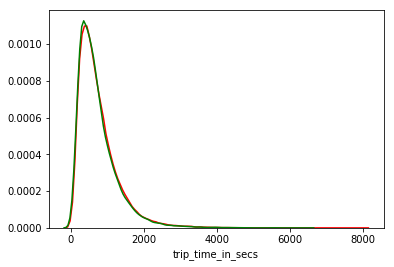

In [118]:
label = 'trip_time_in_secs'

i = 0
for v in lval:
    sns.distplot(tmp.loc[tmp[feat]==v,label],hist=False,color=lcol[i],kde=True)
    i+=1

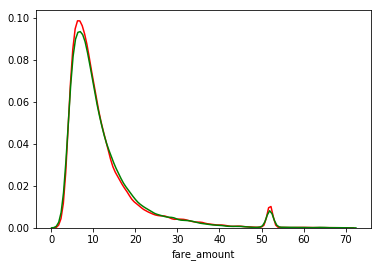

In [119]:
label = 'fare_amount'

i = 0
for v in lval:
    sns.distplot(tmp.loc[tmp[feat]==v,label],hist=False,color=lcol[i],kde=True)
    i+=1

In [102]:
feat = 'trip_late_night'
lval = tmp[feat].value_counts(normalize=True,dropna=True)[(tmp[feat].value_counts(normalize=True,dropna=True)>0.01)].index.values
lcol = ['red','green','blue','yellow','purple','orange','brown','grey','aqua']

lval


array([0, 1])

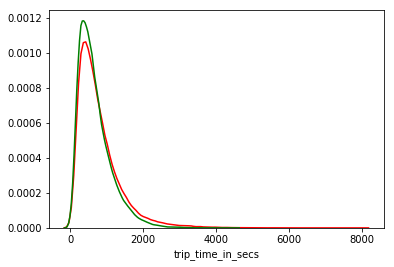

In [103]:
label = 'trip_time_in_secs'

i = 0
for v in lval:
    sns.distplot(tmp.loc[tmp[feat]==v,label],hist=False,color=lcol[i],kde=True)
    i+=1

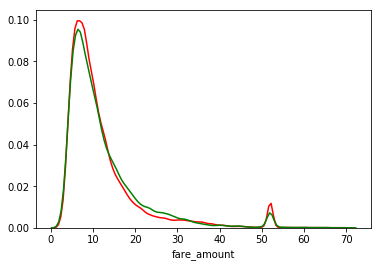

In [104]:
label = 'fare_amount'

i = 0
for v in lval:
    sns.distplot(tmp.loc[tmp[feat]==v,label],hist=False,color=lcol[i],kde=True)
    i+=1

In [111]:
feat = 'pickup_hour_bin'
# lval = tmp[feat].value_counts(normalize=True,dropna=True)[(tmp[feat].value_counts(normalize=True,dropna=True)>0.01)].index.values
lval = tmp[feat].unique()
lval.sort()
lcol = ['red','green','blue','yellow','purple','orange','brown','grey','aqua']

lval


array(['00_05', '06', '07', '08_09', '10_15', '16', '17', '18_20',
       '21_23'], dtype=object)

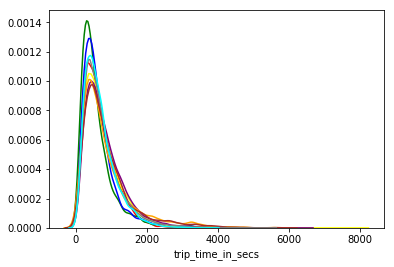

In [112]:
label = 'trip_time_in_secs'

i = 0
for v in lval:
    sns.distplot(tmp.loc[tmp[feat]==v,label],hist=False,color=lcol[i],kde=True)
    i+=1

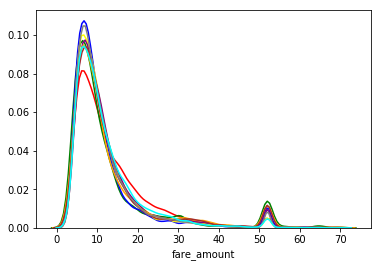

In [113]:
label = 'fare_amount'

i = 0
for v in lval:
    sns.distplot(tmp.loc[tmp[feat]==v,label],hist=False,color=lcol[i],kde=True)
    i+=1

In [125]:
# stats.ks_2samp(df['fare_amount'], tmp.loc[tmp.pickup_addr_administrative_area_level_2=='New York County','fare_amount'])
stats.ks_2samp(df['fare_amount'], tmp.loc[tmp.pickup_addr_administrative_area_level_2=='Queens County','fare_amount'])

Ks_2sampResult(statistic=0.4088140077768627, pvalue=0.0)

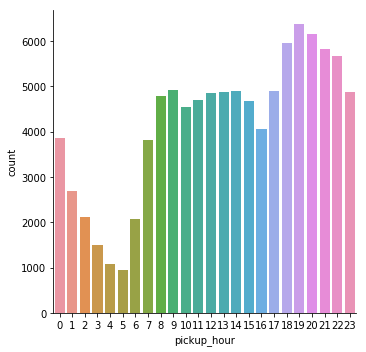

In [39]:
sns.catplot(x='pickup_hour',data=df,kind="count")

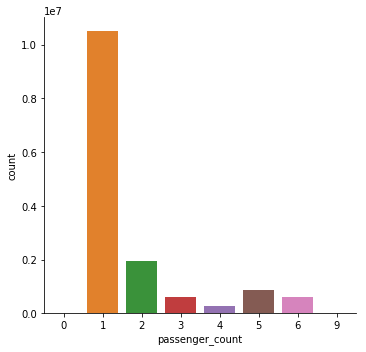

In [49]:
sns.catplot(x='passenger_count',data=df,kind="count")

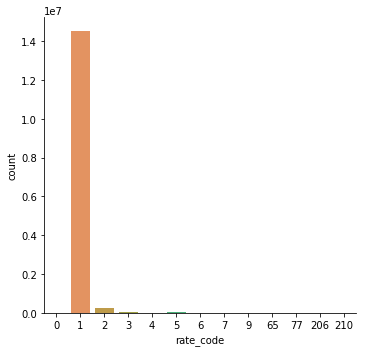

In [51]:
sns.catplot(x='rate_code',data=df,kind="count")

In [59]:
df1 = df\
.groupby(['pickup_addr_local','trip_late_night'])\
.agg({
    'medallion': [np.count_nonzero],
    'fare_amount': [np.mean,np.median,np.std],
    'trip_time_in_secs': [np.mean,np.median,np.std]
})

df1 = df1.reset_index()
df1.columns = ['_'.join(col) for col in df1.columns]

df1 = df1.rename({'pickup_addr_local_':'pickup_addr_local','trip_late_night_':'trip_late_night'})

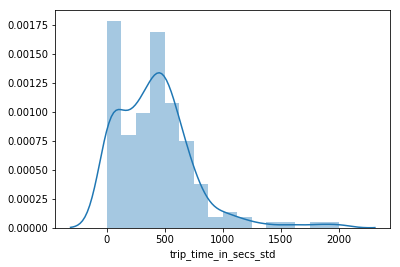

In [79]:
tmp = df1.trip_time_in_secs_std
tmp = tmp.dropna()
sns.distplot(tmp)

In [74]:
tmp = df1.loc[(df1.medallion_count_nonzero>30),'medallion_count_nonzero']

print(tmp.quantile(0.25))
print(tmp.median())
print(tmp.quantile(0.75))
print((tmp.quantile(0.75)-tmp.quantile(0.25))/2)
print(tmp.mean())
print(tmp.std())

52.0
104.0
249.0
98.5
279671.0408163265
1423795.348554041
